## Importing all necessary libraries:

In [1]:

# import requests and json
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
#Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


Test if **stopwords** from Natural Language Toolkit works:

In [2]:

#stopwords.words('english') gives a list of unwanted words in English
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### API key and setting:

In [3]:

#API key and setting for the community api
#https://developer.nytimes.com/docs/community-api-product/1/routes/user-content/url.json/get
api_key = "03Q77oAuM8UocuAmO9MwGeuV65h1KQeD"
article_url = "https://www.nytimes.com/2020/11/19/opinion/anthony-fauci-covid-interview.html"
sort = "newest"


Call API:

In [4]:

# show the API url with all the settings listed out
api_url = (f"https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key={api_key}&url={article_url}&offset=0")
print(api_url)

# calling the API with requests
response = requests.get(api_url)

# creating a variable called data to hold the json formatted result
data = response.json()

data

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=03Q77oAuM8UocuAmO9MwGeuV65h1KQeD&url=https://www.nytimes.com/2020/11/19/opinion/anthony-fauci-covid-interview.html&offset=0


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1605827419',
  'comments': [{'commentID': 110234521,
    'status': 'approved',
    'commentSequence': 110234521,
    'userID': 13957398,
    'userDisplayName': 'nzierler',
    'userLocation': 'New Hartford NY',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': "Dr. Fauci is a wonderful human being and a highly regarded expert on infectious diseases. For his integrity and courage to speak the truth against Trump's contradicting and attempting to belittle him, the doctor deserves the Congressional Medal of Honor and the opportunity to continue in his role under President-elect Biden.",
    'createDate': '1605825209',
    'updateDate': '1605827358',
    'approveDate': '1605825210',
    'recommendations': 8,
    'replyCount

## Narrowing down comments after API response

Find the comment list within API response.

Convert it to data frame to view in chart by pandas

In [5]:

# isolate just the comments dictionary
comments_data = data['results']['comments']

#use pd to chart out the comments info
comments_df = pd.DataFrame(comments_data)
comments_df

#display all 26 columns
pd.set_option('display.max_columns', 26)

comments_df

,commentID,status,commentSequence,userID,userDisplayName,userLocation,userTitle,userURL,picURL,commentTitle,commentBody,createDate,updateDate,approveDate,recommendations,replyCount,replies,editorsSelection,parentID,parentUserDisplayName,depth,commentType,trusted,recommendedFlag,permID,isAnonymous
0,110234521,approved,110234521,13957398,nzierler,New Hartford NY,NULL,NULL,None,<br\//>,Dr. Fauci is a wonderful human being and a hig...,1605825209,1605827358,1605825210,8,0,[],False,None,None,1,comment,0,0,110234521,False
1,110234479,approved,110234479,68930191,Dot,"Boston, MA",NULL,NULL,None,<br\//>,"Dr. Fauci: ""But we’ll start approaching normal...",1605824954,1605827152,1605824955,1,0,[],False,None,None,1,comment,0,0,110234479,False
2,110234358,approved,110234358,69545768,sam finn,california,NULL,NULL,None,<br\//>,A mask mandate will be heavily opposed if it i...,1605824137,1605824139,1605824139,0,0,[],False,None,None,1,comment,0,0,110234358,False
3,110234340,approved,110234340,79172841,Jennie,WA,NULL,NULL,None,<br\//>,I think we should keep masks even after covid....,1605824015,1605826624,1605824015,5,0,[],False,None,None,1,comment,0,0,110234340,False
4,110234306,approved,110234306,62628811,GMJ,Seattle,NULL,NULL,None,<br\//>,"The last answer got me so depressed, I cried. ...",1605823812,1605823813,1605823813,0,0,[],False,None,None,1,comment,0,0,110234306,False
5,110233614,approved,110233614,57681735,PaulCurson,"Brisbane, Aust",NULL,NULL,None,<br\//>,In Australia we had a an anti-drink driving ca...,1605819514,1605826284,1605823733,3,0,[],False,None,None,1,comment,0,0,110233614,False
6,110231759,approved,110231759,46771980,Elle Muses,"Oxford, Mississippi",NULL,NULL,None,<br\//>,Thank God for Dr. Fauci.,1605810731,1605824925,1605823220,5,0,[],False,None,None,1,comment,0,0,110231759,False
7,110226268,approved,110226268,66423541,Sgt Schulz,Oz,NULL,NULL,None,<br\//>,And to think the mob was chanting “Fire Fauci”,1605794158,1605827227,1605823218,2,0,[],False,None,None,1,comment,0,0,110226268,False
8,110227620,approved,110227620,2392360,Mike in New Mexico,"Angel Fire, NM",NULL,NULL,None,<br\//>,Rush Limbaugh should be stripped of his Medal ...,1605798580,1605827392,1605823216,9,0,[],False,None,None,1,comment,0,0,110227620,False
9,110226967,approved,110226967,96122010,JC,Pennsylvania,NULL,NULL,None,<br\//>,"What a ridiculous title, ""when will we throw o...",1605796668,1605823198,1605823198,0,0,[],False,None,None,1,comment,0,0,110226967,False


## Isolate comment number by index and just look at the commentBody

In [10]:

# look at just one of the comments
#store comment index in a variable
comment = comments_df.loc[14, 'commentBody']

comment


"My wife and I left deep red rural Michigan over a decade ago and I have waited a decade to explain the difference between Quebec's secular humanist liberal democracy and the GOP's constitutional republic and today I can present an excellent analogy that may explain the differences and the pros and cons of the two systems. \nQuebec shares a border with NY21 where much of its economy is owned by Quebec residents who love neoliberal constitutional Republics. Entrepreneurs are entrepreneurs are entrepreneurs. There is no better place to invest in better than depressed neoliberal constitutional republics.\nQuebec's economy is booming and we will have worker shortages for the next 20 years.\nNowhere in the universe are the Oprahs and the dispensers of the common wisdom more welcomed in our homes than here in Quebec. However we are heavily invested in educating and providing employment for our experts.\nWhile NYS is closing its schools and keeping its bars , restaurants, bowling alleys and g

### Clean comment content

Convert the comment into a string

Clean comment:
- lower text
- remove all unwanted characters
- use nltk to clean stopwords from text


In [11]:

# convert comment to a string value
comment = str(comment)

#test if comment is a str or not
# print(type(comment))

comment_lower = comment.lower()

# print(comment13_lower)

unwanted = ['?', ':', ',', '!', ';', '...', '.', '\'', '"', '-']

txt = comment_lower
for char in unwanted:
        txt = txt.replace(char, '')

# print(txt)

#Sets are used to store multiple items in a single variable.
stop_words = set(stopwords.words('english')) #a set of stopwords words in English
#prepare txt string into a list to filter through
txt_token = word_tokenize(txt)

#filter thru the list of txt_token then add word if it is not unwanted.
filtered_txt = []
for word in txt_token:
    if word not in stop_words:
        filtered_txt.append(word)

#convert list to string
txt_str = ' '.join(filtered_txt)

print(txt_str)


wife left deep red rural michigan decade ago waited decade explain difference quebecs secular humanist liberal democracy gops constitutional republic today present excellent analogy may explain differences pros cons two systems quebec shares border ny21 much economy owned quebec residents love neoliberal constitutional republics entrepreneurs entrepreneurs entrepreneurs better place invest better depressed neoliberal constitutional republics quebecs economy booming worker shortages next 20 years nowhere universe oprahs dispensers common wisdom welcomed homes quebec however heavily invested educating providing employment experts nys closing schools keeping bars restaurants bowling alleys gyms open experts telling us keep schools open close restaurants bars gyms bowling alleys provincial prime minister difficulty closing bars restaurants entertainment centers people spoken provincial prime minister problem keeping schools open many us listen oprahs instead experts like liberal democracy 

### Create a dict to store key,value frequency from comment

In [12]:
# sample_txt = ['apple', 'pear', 'kiwi', 'apple', 'mango', 'kiwi']

txt_data = {}

for word in filtered_txt:
    if word in txt_data:
        txt_data[word] += 1
    else:
        txt_data[word] = 1

print(txt_data)


{'wife': 1, 'left': 1, 'deep': 1, 'red': 1, 'rural': 1, 'michigan': 1, 'decade': 2, 'ago': 1, 'waited': 1, 'explain': 2, 'difference': 1, 'quebecs': 2, 'secular': 1, 'humanist': 1, 'liberal': 2, 'democracy': 2, 'gops': 1, 'constitutional': 3, 'republic': 1, 'today': 1, 'present': 1, 'excellent': 1, 'analogy': 1, 'may': 1, 'differences': 1, 'pros': 1, 'cons': 1, 'two': 1, 'systems': 1, 'quebec': 3, 'shares': 1, 'border': 1, 'ny21': 1, 'much': 1, 'economy': 2, 'owned': 1, 'residents': 1, 'love': 1, 'neoliberal': 2, 'republics': 2, 'entrepreneurs': 4, 'better': 2, 'place': 1, 'invest': 1, 'depressed': 1, 'booming': 1, 'worker': 1, 'shortages': 1, 'next': 1, '20': 1, 'years': 1, 'nowhere': 1, 'universe': 1, 'oprahs': 2, 'dispensers': 1, 'common': 1, 'wisdom': 1, 'welcomed': 1, 'homes': 1, 'however': 1, 'heavily': 1, 'invested': 1, 'educating': 1, 'providing': 1, 'employment': 1, 'experts': 4, 'nys': 1, 'closing': 2, 'schools': 3, 'keeping': 2, 'bars': 3, 'restaurants': 3, 'bowling': 2, 'al

## Visualize the data from comment

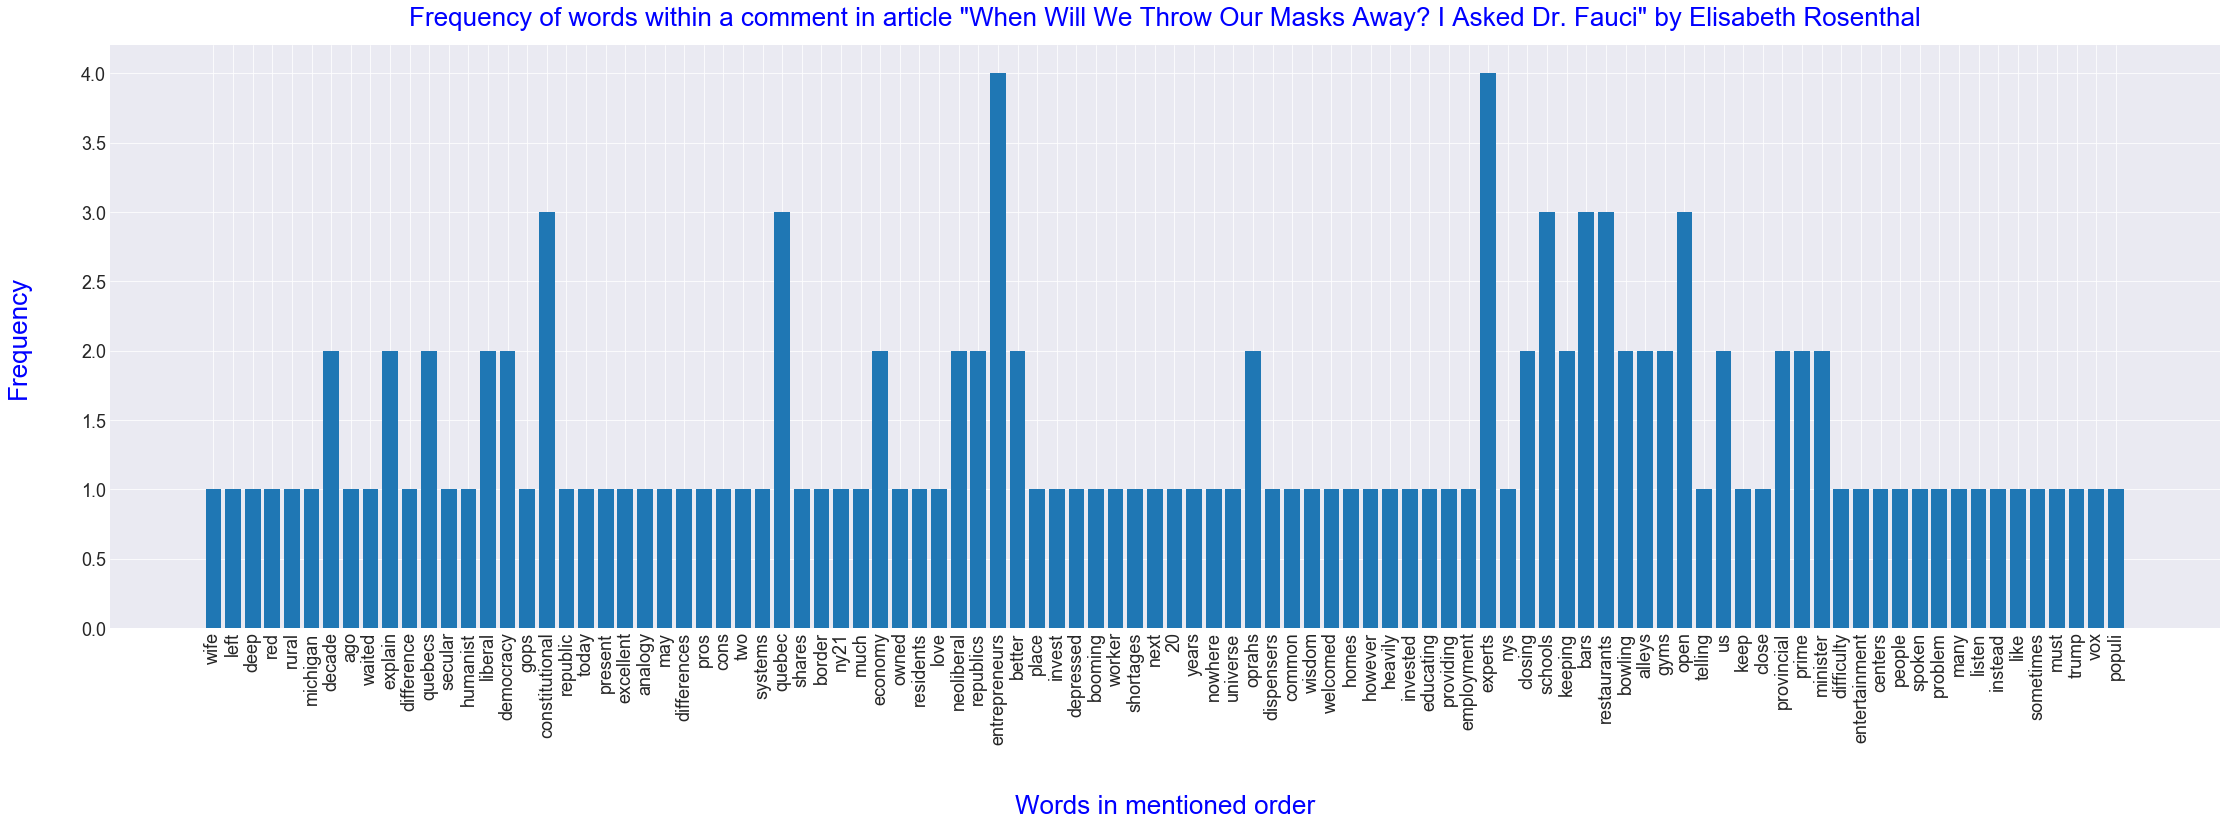

In [14]:

words_x = []
frequency_y = []

words_x = list(txt_data.keys())
frequency_y = list(txt_data.values())

plt.figure(figsize=(30, 10))  #figsize=(width, height)
plt.bar(words_x, frequency_y, align = 'center')

plt.xticks(fontsize = 18, rotation = 'vertical')
plt.yticks(fontsize = 18)

plt.tight_layout()
plt.style.use('seaborn-darkgrid')

plt.xlabel('Words in mentioned order', fontsize = 26, labelpad = 50, color = 'blue')
plt.ylabel('Frequency', fontsize = 26, labelpad = 50, color = 'blue')

plt.title('Frequency of words within a comment in article "When Will We Throw Our Masks Away? I Asked Dr. Fauci" by Elisabeth Rosenthal', fontsize = 26, pad = 20, color = 'blue')

plt.show()